# 机器学习练习 1 - 线性回归

## 单变量线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = 'Salary_Data.csv'
data = pd.read_csv(path, header=None, names=['YearsExperience', 'Salary'])
data.head()
#练习1还包括一个时间预测数据集，其中有1个变量（车子英里数）和目标（时间）

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


看下数据长什么样子

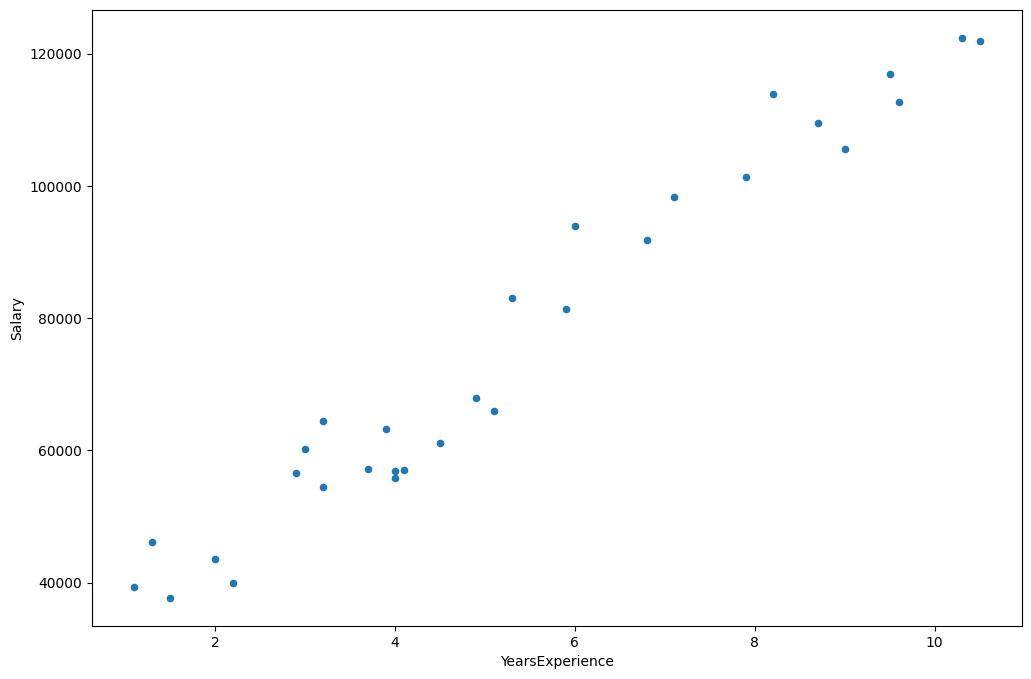

In [5]:
data.plot(kind='scatter', x='YearsExperience', y='Salary', figsize=(12,8))
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$ 

In [6]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [7]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
data.insert(0, 'Ones', 1)

DataFrame.insert(loc, column, value, allow_duplicates=False)

Parameters：

loc ：参数column插入的位置，如果想插入到第一例则为0，取值范围： 0 <= loc <= len(columns),其中len(columns)为Dataframe的列数

column ：给插入数据value取列名，可为数字，字符串等

value ：可以是整数，Series或者数组等

allow_duplicates : 默认 False

In [9]:
data.head()

,Ones,YearsExperience,Salary
0,1,1.1,39343
1,1,1.3,46205
2,1,1.5,37731
3,1,2.0,43525
4,1,2.2,39891


现在我们来做一些变量初始化。

In [9]:
data.shape

(30, 3)

In [17]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列

### Pandas中loc与iloc
+ loc从索引中获取具有特定标签的行（或列）。
+ iloc在索引中的特定位置获取行（或列）（因此它只接受整数）。

观察下 X (训练集) and y (目标变量)是否正确.

In [12]:
X.head()#head()是观察前5行

,Ones,YearsExperience
0,1,1.1
1,1,1.3
2,1,1.5
3,1,2.0
4,1,2.2


In [14]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [22]:
X = np.matrix(X.values)
y = np.matrix(y.values)


AttributeError: 'matrix' object has no attribute 'values'

In [28]:
theta = np.matrix(np.array([-6,100]))

### numpy中matrix 和 array的区别
（1） Numpy matrices必须是2维的,但是 numpy arrays (ndarrays) 可以是多维的（1D，2D，3D····ND）. Matrix是Array的一个小的分支，包含于Array。所以matrix 拥有array的所有特性。

（2） 在numpy中matrix的主要优势是：相对简单的乘法运算符号。例如，a和b是两个matrices，那么a*b，就是矩阵积。


（3） matrix 和 array 都可以通过objects后面加.T 得到其转置。但是 matrix objects 还可以在后面加 .H 得到共轭矩阵, 加 .I 得到逆矩阵。

 

（4） 相反的是在numpy里面arrays遵从逐个元素的运算，所以array：c 和d的c*d运算相当于matlab里面的c.*d运算。而矩阵相乘，则需要numpy里面的dot命令 :



In [19]:
theta

matrix([[0, 0]])

theta 是一个(1,2)矩阵

看下维度

In [20]:
X.shape, theta.shape, y.shape

((30, 2), (1, 2), (30, 1))

计算代价函数 (theta初始值为0).

In [29]:
computeCost(X, y, theta)

3204370696.7

# gradient decent（梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [59]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) # ravel()多维数组转换为一维数组,和flatten()的功能相似
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [79]:
alpha = 0.01
iters = 200

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [80]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
cost



array([1.32586271e+09, 5.75508235e+08, 2.75692661e+08, 1.55804507e+08,
       1.07772636e+08, 8.84378664e+07, 8.05641887e+07, 7.72682440e+07,
       7.58010984e+07, 7.50649379e+07, 7.46213378e+07, 7.42952065e+07,
       7.40166170e+07, 7.37576407e+07, 7.35071213e+07, 7.32606009e+07,
       7.30162966e+07, 7.27734936e+07, 7.25319039e+07, 7.22914101e+07,
       7.20519624e+07, 7.18135385e+07, 7.15761270e+07, 7.13397207e+07,
       7.11043142e+07, 7.08699029e+07, 7.06364822e+07, 7.04040481e+07,
       7.01725962e+07, 6.99421225e+07, 6.97126228e+07, 6.94840929e+07,
       6.92565288e+07, 6.90299263e+07, 6.88042815e+07, 6.85795903e+07,
       6.83558486e+07, 6.81330525e+07, 6.79111978e+07, 6.76902808e+07,
       6.74702973e+07, 6.72512435e+07, 6.70331154e+07, 6.68159091e+07,
       6.65996207e+07, 6.63842464e+07, 6.61697822e+07, 6.59562244e+07,
       6.57435690e+07, 6.55318124e+07, 6.53209506e+07, 6.51109799e+07,
       6.49018965e+07, 6.46936968e+07, 6.44863769e+07, 6.42799331e+07,
      

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [70]:
computeCost(X, y, g)
g

matrix([[25792.20018346,  9449.96232371]])

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

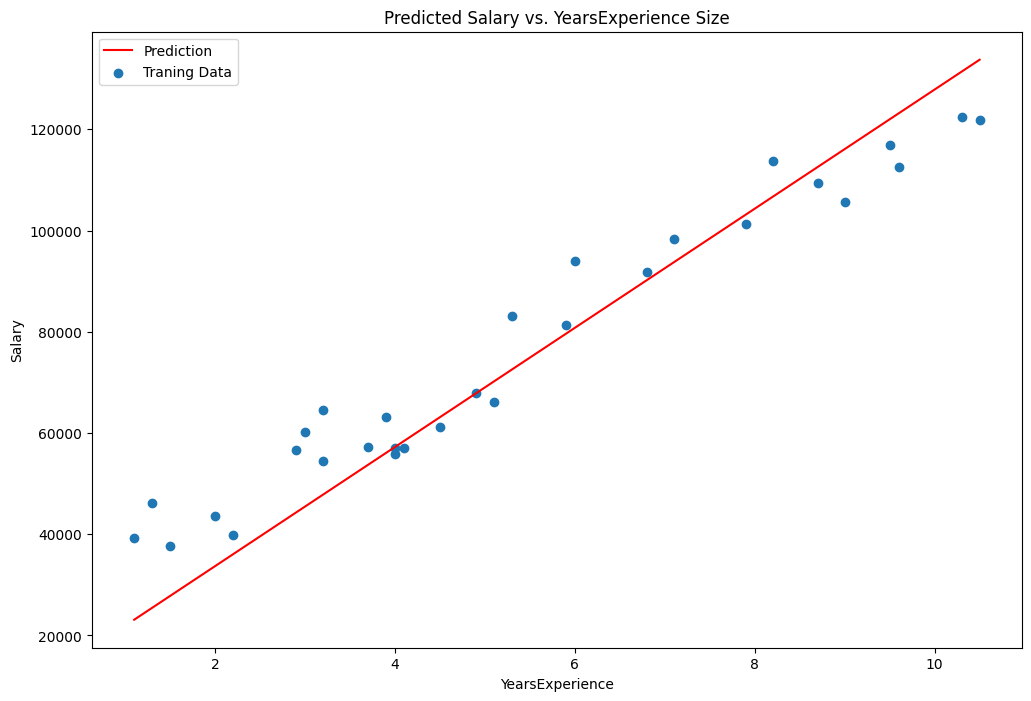

In [81]:
x = np.linspace(data.YearsExperience.min(), data.YearsExperience.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.YearsExperience, data.Salary, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Salary')
ax.set_title('Predicted Salary vs. YearsExperience Size')
plt.show()

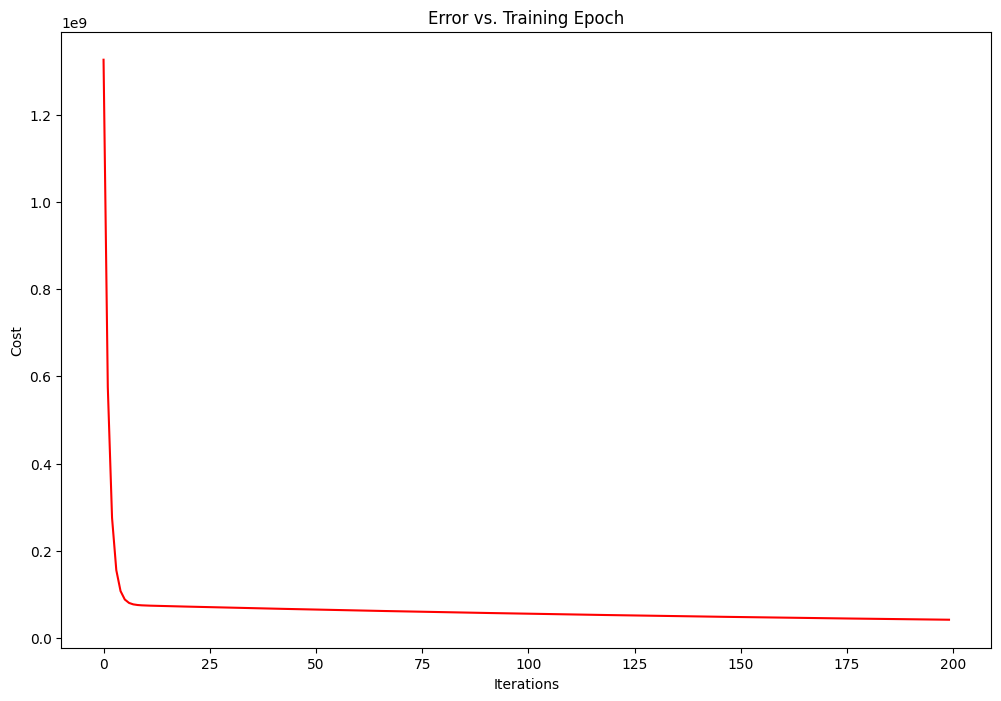

In [82]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [90]:
import tensorflow as tf
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_dim=2))
model.compile(optimizer='SGD',loss='mse')
model.fit(X,y,epochs=10)


Train on 30 samples
Epoch 1/10
30/30 [==============================] - 0s 4ms/sample - loss: 6502953984.0000
Epoch 2/10
30/30 [==============================] - 0s 39us/sample - loss: 525588128.0000
Epoch 3/10
30/30 [==============================] - 0s 34us/sample - loss: 156518976.0000
Epoch 4/10
30/30 [==============================] - 0s 36us/sample - loss: 132264608.0000
Epoch 5/10
30/30 [==============================] - 0s 35us/sample - loss: 129234680.0000
Epoch 6/10
30/30 [==============================] - 0s 36us/sample - loss: 127534976.0000
Epoch 7/10
30/30 [==============================] - 0s 32us/sample - loss: 125941984.0000
Epoch 8/10
30/30 [==============================] - 0s 35us/sample - loss: 124380128.0000
Epoch 9/10
30/30 [==============================] - 0s 32us/sample - loss: 122844328.0000
Epoch 10/10
30/30 [==============================] - 0s 31us/sample - loss: 121333880.0000


## 多变量线性回归

练习1还包括一个时间预测数据集，其中有2个变量（车子英里数，次数）和目标（时间）。 我们使用我们已经应用的技术来分析数据集。
多变量线性回归求解步骤和单变量线性回归相似，值得注意的一个问题是：
对于多个特征变量，在计算模型参数之前要记得进行特征缩放，使各个特征值大致在同一范围内，有利于进行梯度下降算法求解模型参数。
X^'=(X-μ)/σ  μ是特征值的平均值，σ是标准偏差。


In [88]:
path = 'Salary_Datayears.csv'
data2 = pd.read_csv(path, header=None, names=['YearsExperience','day', 'Salary'])
data2.head()
data2.describe()

,YearsExperience,day,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,23.600000,76003.000000
std,2.837888,1.792706,27414.429785
min,1.100000,20.000000,37731.000000
25%,3.200000,22.250000,56720.750000
50%,4.700000,24.000000,65237.000000
75%,7.700000,25.000000,100544.750000
max,10.500000,27.000000,122391.000000


对于此任务，我们添加了另一个预处理步骤 - 特征归一化(特征缩放）。 这个对于pandas来说很简单

In [89]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,YearsExperience,day,Salary
0,-1.484672,0.223126,-1.337252
1,-1.414197,-0.892506,-1.086946
2,-1.343722,0.780943,-1.396053
3,-1.167535,0.780943,-1.184705
4,-1.097060,-1.450322,-1.317262


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [ ]:
data2.insert(0, 'Ones', 1)

In [108]:
alpha=0.01
iters=1000
# add ones co
#

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.012608977863332102

In [97]:
g2

matrix([[1.14204942e-16, 9.73271057e-01, 1.30320716e-01]])

我们也可以快速查看这一个的训练进程。

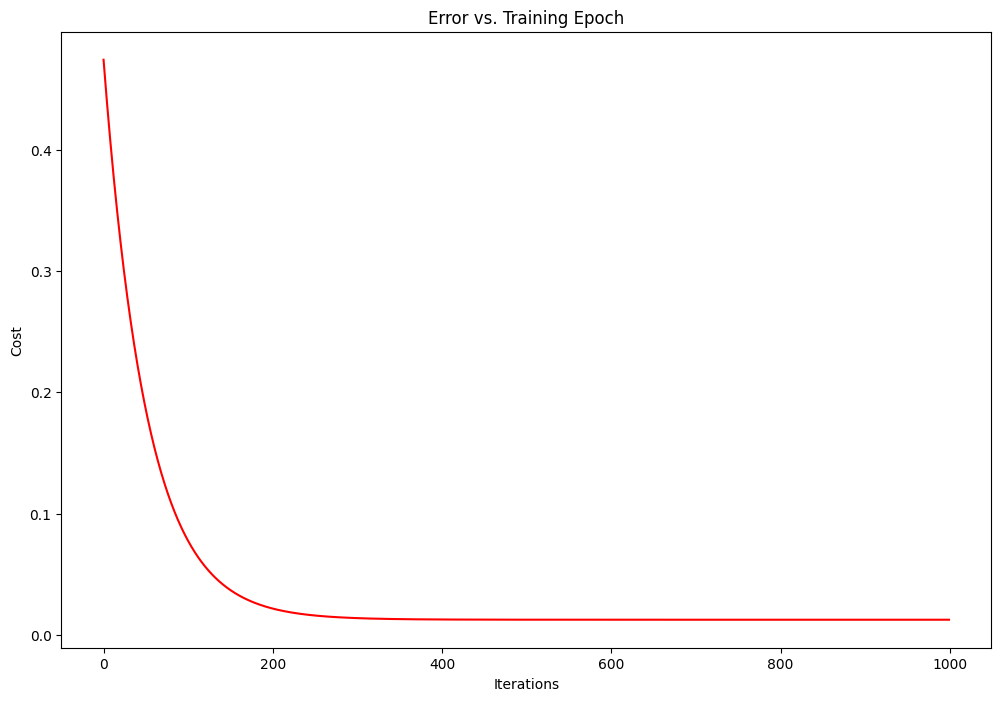

In [98]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [107]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

scikit-learn model的预测表现

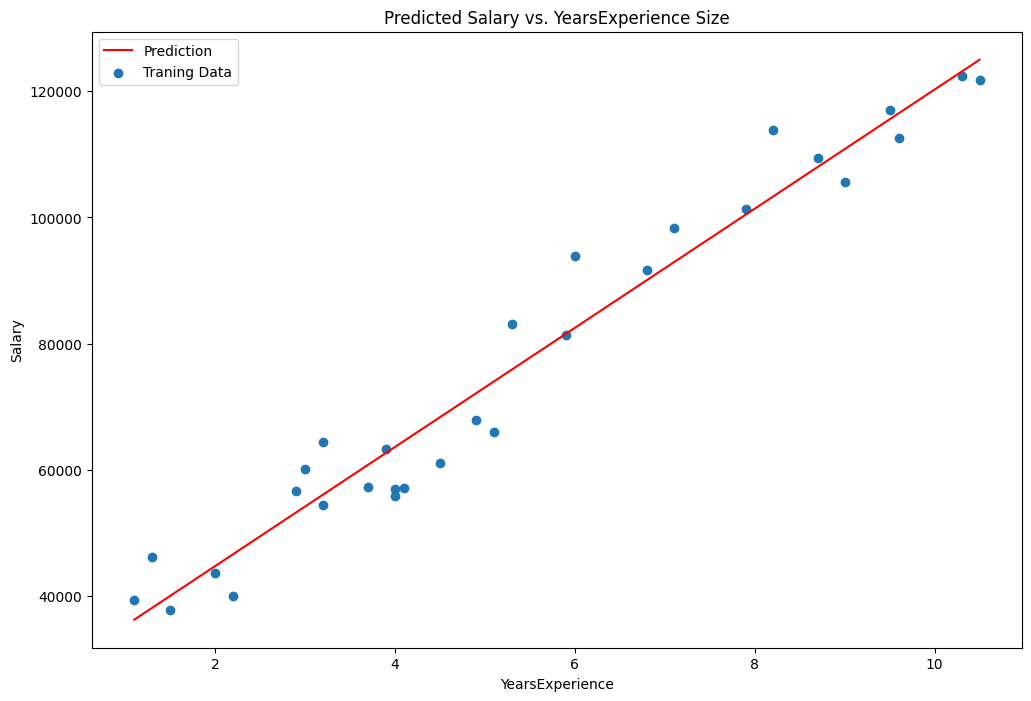

In [101]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.YearsExperience, data.Salary, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Salary')
ax.set_title('Predicted Salary vs. YearsExperience Size')
plt.show()

In [ ]:
import tensorflow as tf

In [109]:
import tensorflow as tf
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_dim=3))
model.compile(optimizer='SGD',loss='mse')
model.fit(X2,y2,epochs=100,batch_size=32)

Train on 30 samples
Epoch 1/100
30/30 [==============================] - 0s 4ms/sample - loss: 3.7095
Epoch 2/100
30/30 [==============================] - 0s 44us/sample - loss: 3.5544
Epoch 3/100
30/30 [==============================] - 0s 41us/sample - loss: 3.4063
Epoch 4/100
30/30 [==============================] - 0s 34us/sample - loss: 3.2647
Epoch 5/100
30/30 [==============================] - 0s 33us/sample - loss: 3.1293
Epoch 6/100
30/30 [==============================] - 0s 30us/sample - loss: 2.9999
Epoch 7/100
30/30 [==============================] - 0s 33us/sample - loss: 2.8762
Epoch 8/100
30/30 [==============================] - 0s 33us/sample - loss: 2.7578
Epoch 9/100
30/30 [==============================] - 0s 30us/sample - loss: 2.6446
Epoch 10/100
30/30 [==============================] - 0s 28us/sample - loss: 2.5363
Epoch 11/100
30/30 [==============================] - 0s 28us/sample - loss: 2.4326
Epoch 12/100
30/30 [==============================] - 0s 30us/samp

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_dim=1))
model.compile(optimizer='sgd',loss='mse')
model.fit(X,y,epochs=10,batch_size=32)
